# Dataset 1: Credit Card Fraud Detection
Obtained from www.kaggle.com

## Imports and setup

In [85]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization

from mlxtend.plotting import plot_confusion_matrix

## My Anaconda environment can't find my CUDA dll... I'll have to fix this later
#tf.config.list_physical_devices('GPU')

## Load and preview the dataset

In [144]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Preprocessing

### Check for missing vals

In [46]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Check the relative balance of the target values

In [47]:
positive = df[df['Class'] == 1]
negative = df[df['Class'] == 0]

print(positive.shape)
print(negative.shape)

(492, 31)
(284315, 31)


Because this dataset contains a very large imbalance between the positive and negative classes, we will need to drop many of the majority class to ensure a proper balance. We will do this randomly by taking a sample over the shape of the positive class.

In [48]:
negative = negative.sample(positive.shape[0])

print(positive.shape)
print(negative.shape)

(492, 31)
(492, 31)


In [49]:
df = df[0:0]
df = df.append(negative, ignore_index=True)
df = df.append(positive, ignore_index=True)

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,121172.0,2.120954,-1.178156,-0.889885,-1.105893,-0.703688,0.231666,-1.166385,0.156527,0.014959,...,0.335272,0.888306,0.064896,0.109218,-0.111443,-0.102519,-0.009054,-0.054165,39.99,0
1,112880.0,1.928799,2.544010,-4.401637,4.813564,2.584664,-2.154732,1.365098,-0.510636,-1.971892,...,-0.338069,-0.863029,-0.079824,-0.638896,0.312391,0.072996,0.021780,0.114659,3.79,0
2,60561.0,-0.741043,0.799743,0.408811,0.374953,0.986128,5.021792,-0.212899,0.143596,-0.022993,...,0.908968,0.323298,-0.157783,1.038385,-0.050004,-0.047713,0.102068,0.085813,169.16,0
3,142921.0,2.028051,0.005795,-1.420277,0.141980,0.359333,-0.615395,0.183424,-0.231251,0.150564,...,0.309887,1.026889,0.008735,0.831393,0.288248,-0.168898,-0.022123,-0.057938,7.65,0
4,135133.0,2.025863,-0.454732,-0.390452,-0.738359,-0.772913,-0.968022,-0.443527,-0.214936,1.267992,...,-0.148951,-0.250787,0.394787,0.038032,-0.612665,0.331561,-0.027573,-0.042144,12.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Allocate data for training and testing

In [50]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

print (X_train.shape, X_test.shape)

(787, 30) (197, 30)


In [51]:
sscale = StandardScaler()

X_train = sscale.fit_transform(X_train)
X_test = sscale.transform(X_test)

## Reshape the data to fit the 3-D CNN input

In [52]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print (X_train.shape, X_test.shape)

(787, 30, 1) (197, 30, 1)


## Create the CNN

In [133]:
# Sequential CNN with 1-D layers and random neuron dropping
cnn = Sequential()

cnn.add( Conv1D(filters=8, kernel_size=2, activation='relu', input_shape = X_train[0].shape) )
cnn.add(Dropout(0.25))

cnn.add( Conv1D(filters=16, kernel_size=2, activation='relu') )
cnn.add(Dropout(0.5))

cnn.add( Conv1D(filters=16, kernel_size=2, activation='relu') )
cnn.add(Dropout(0.5))

cnn.add(Flatten())
cnn.add(Dense(units=16, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_results = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=True)

Epoch 1/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6629 - accuracy: 0.5832 - val_loss: 0.6194 - val_accuracy: 0.8477
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7281 - val_loss: 0.5003 - val_accuracy: 0.8629
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4496 - accuracy: 0.8094 - val_loss: 0.4029 - val_accuracy: 0.8426
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.8437 - val_loss: 0.3642 - val_accuracy: 0.8629
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8513 - val_loss: 0.3618 - val_accuracy: 0.8579
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3658 - accuracy: 0.8602 - val_loss: 0.3290 - val_accuracy: 0.8629
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3478 - accuracy: 0.8691 - val_loss: 0.3176 - val_accuracy: 0.8680
Epoch 8/10
25/25 [==

In [134]:
y_pred = cnn.predict_classes(X_test)

## Examine the learning curves and confusion matrix

In [135]:
cnn_history.history

{'loss': [0.48073843121528625,
  0.3008459806442261,
  0.27508580684661865,
  0.22623570263385773,
  0.27389174699783325,
  0.19517658650875092,
  0.20944301784038544,
  0.17781072854995728,
  0.18361660838127136,
  0.19532710313796997,
  0.17618170380592346,
  0.17897063493728638,
  0.16086088120937347,
  0.16311582922935486,
  0.16058267652988434,
  0.17426176369190216,
  0.16464181244373322,
  0.14576087892055511,
  0.15628378093242645,
  0.14295868575572968,
  0.14352421462535858,
  0.13518314063549042,
  0.13525018095970154,
  0.14486706256866455,
  0.12643401324748993,
  0.1462235450744629,
  0.1380425989627838,
  0.13601726293563843,
  0.1251593679189682,
  0.1246756911277771,
  0.11884446442127228,
  0.11615480482578278,
  0.12026713043451309,
  0.11181721836328506,
  0.11595838516950607,
  0.12608768045902252,
  0.11894067376852036,
  0.13093851506710052,
  0.11403986811637878,
  0.11476142704486847,
  0.10758157074451447,
  0.09882926940917969,
  0.10920596122741699,
  0.1100

### Plot the model accuracy

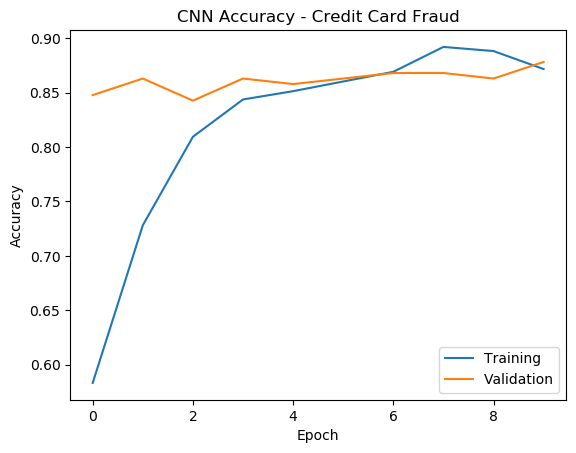

In [140]:
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('CNN Accuracy - Credit Card Fraud')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Training', 'Validation'])
#plt.savefig('ccf_acc_03.png')
plt.show()

### Plot the model loss

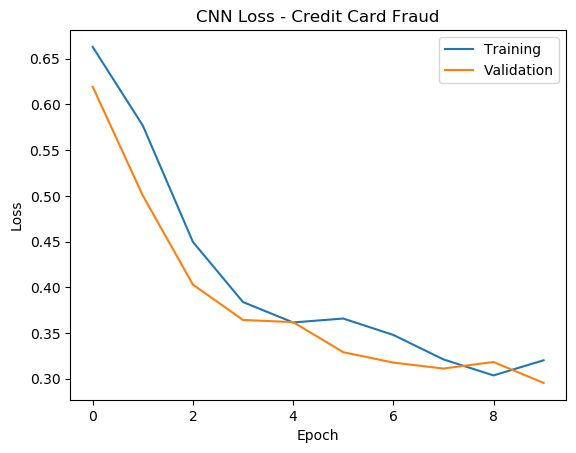

In [141]:
plt.plot(cnn_results.history['loss'])
plt.plot(cnn_results.history['val_loss'])
plt.title('CNN Loss - Credit Card Fraud')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Training', 'Validation'])
#plt.savefig('ccf_loss_03.png')
plt.show()

In [142]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

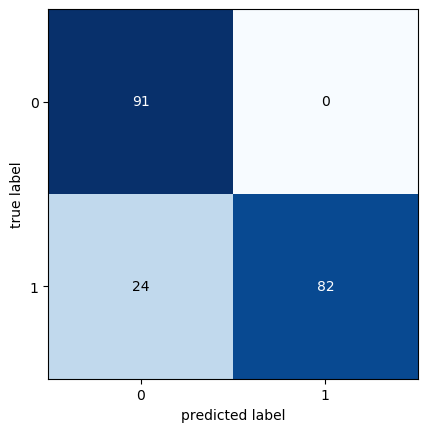

In [143]:
matrix = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matrix)
#fig.savefig('ccf_cm_03')